## Initial Data Exploration
Done by: Chamath Wijerathne, Nada Rahali, Tanjuma Haque

In [149]:
# import statements 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

from scipy.stats import zscore



In [150]:
def load_dataset_rowwise(file1, file2):
    # read
    df1 = pd.read_csv(file1)        
    df2 = pd.read_csv(file2)

    print(f"file1: {df1.shape}, file2: {df2.shape}")

    df1.columns = df1.columns.str.strip()
    df2.columns = df2.columns.str.strip()

    # vertically concatenating the 2 dfs (row-wise)
    df = pd.concat([df1, df2], axis=0, join="outer", ignore_index=True)

    df = df.loc[:, ~df.columns.str.contains("^Unnamed")] # remove the index col

    wl_cols = [c for c in df.columns if str(c).isdigit()]
    trait_cols = [c for c in df.columns if c not in wl_cols]

    X = df[wl_cols].copy()
    Y = df[trait_cols].copy()

    print(f"row-wise merged: {df.shape[0]} samples, {X.shape[1]} wavelength predictors, {Y.shape[1]} trait columns.")
    return X, Y, df

X, Y, df = load_dataset_rowwise("../data/raw/data_part_1.csv", "../data/raw/data_part_2.csv")

file1: (12180, 1742), file2: (1115, 1759)
row-wise merged: 13295 samples, 1721 wavelength predictors, 37 trait columns.


In [151]:
# getting counts per trait after row-wise merge
Y_notnull = Y.notna().sum().sort_values(ascending=False)
display(Y_notnull.head(15))

print("total rows:", df.shape[0])


LMA (g/m²)                     8580
N content (mg/cm²)             6610
C content (mg/cm²)             5889
Chl content (μg/cm²)           5783
EWT (mg/cm²)                   5084
Carotenoid content (μg/cm²)    4642
Lignin (mg/cm²)                4589
Cellulose (mg/cm²)             4541
Fiber (mg/cm²)                 4473
Phosphorus content (mg/cm²)    4252
Magnesium content (mg/cm²)     4138
Copper content (mg/cm²)        4083
NSC (mg/cm²)                   4046
LAI (m²/m²)                    4042
Boron content (mg/cm²)         4029
dtype: int64

total rows: 13295


In [152]:
df.head(5)


,Anthocyanin content (μg/cm²),Boron content (mg/cm²),C content (mg/cm²),Ca content (mg/cm²),Carotenoid content (μg/cm²),Cellulose (mg/cm²),Chl content (μg/cm²),Copper content (mg/cm²),EWT (mg/cm²),Fiber (mg/cm²),...,Copper concentration (mg/g),Fiber (mg/g),Lignin (mg/g),Magnesium concentration (mg/g),Manganese concentration (mg/g),N concentration (mg/g),NSC (mg/g),P concentration (mg/g),Potassium concentration (mg/g),Sulfur concentration (mg/g)
0,NaN,NaN,NaN,0.091526,NaN,NaN,34.047382,NaN,10.889923,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,0.038488,NaN,NaN,23.320021,NaN,10.270048,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,0.026577,NaN,NaN,27.098073,NaN,11.423791,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,0.013190,NaN,NaN,27.638014,NaN,13.132381,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,0.082163,NaN,NaN,23.159727,NaN,11.625371,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [153]:
# displaying all column names in df
pd.set_option('display.max_columns', None)
print(df.columns.tolist())
pd.reset_option('display.max_columns')

['Anthocyanin content (μg/cm²)', 'Boron content (mg/cm²)', 'C content (mg/cm²)', 'Ca content (mg/cm²)', 'Carotenoid content (μg/cm²)', 'Cellulose (mg/cm²)', 'Chl content (μg/cm²)', 'Copper content (mg/cm²)', 'EWT (mg/cm²)', 'Fiber (mg/cm²)', 'LAI (m²/m²)', 'LMA (g/m²)', 'Lignin (mg/cm²)', 'Magnesium content (mg/cm²)', 'Manganese content (mg/cm²)', 'N content (mg/cm²)', 'NSC (mg/cm²)', 'Phosphorus content (mg/cm²)', 'Potassium content (mg/cm²)', 'Sulfur content (mg/cm²)', '400', '401', '402', '403', '404', '405', '406', '407', '408', '409', '410', '411', '412', '413', '414', '415', '416', '417', '418', '419', '420', '421', '422', '423', '424', '425', '426', '427', '428', '429', '430', '431', '432', '433', '434', '435', '436', '437', '438', '439', '440', '441', '442', '443', '444', '445', '446', '447', '448', '449', '450', '451', '452', '453', '454', '455', '456', '457', '458', '459', '460', '461', '462', '463', '464', '465', '466', '467', '468', '469', '470', '471', '472', '473', '474',

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13295 entries, 0 to 13294
Columns: 1758 entries, Anthocyanin content (μg/cm²) to Sulfur concentration (mg/g)
dtypes: float64(1758)
memory usage: 178.3 MB


In [155]:
#finding missing rows
#counting X and Y missing values independently
missing_X = X.isna().sum().sum()
missing_Y = Y.isna().sum().sum()
print(f"missing values in X: {missing_X}")
print(f"missing values in Y: {missing_Y}")
#getting % of missing overall
total_values = X.size + Y.size
total_missing = missing_X + missing_Y
missing_percentage = (total_missing / total_values) * 100
print(f"overall missing percentage: {missing_percentage:.2f}%")

# missing per trait
trait_missing = Y.isna().sum()
trait_missing_pct = (trait_missing / Y.shape[0]) * 100
trait_missing_df = pd.DataFrame({"missing_count": trait_missing, 
                                 "missing_pct": trait_missing_pct, 
                                 "non_missing_count": Y.shape[0] - trait_missing
}).sort_values(by="missing_pct", ascending=False)


most_prevalent_traits = trait_missing_df[trait_missing_df["non_missing_count"] > 5000]
print(most_prevalent_traits.shape[0], "traits with >5000 non-missing values.")
most_prevalent_traits = most_prevalent_traits.sort_values(by="non_missing_count", ascending=False).head(5)
print("top 5 most prevalent traits (>5000 non-missing values):")
display(most_prevalent_traits)



missing values in X: 0
missing values in Y: 397167
overall missing percentage: 1.70%
5 traits with >5000 non-missing values.
top 5 most prevalent traits (>5000 non-missing values):


,missing_count,missing_pct,non_missing_count
LMA (g/m²),4715,35.464460,8580
N content (mg/cm²),6685,50.282061,6610
C content (mg/cm²),7406,55.705152,5889
Chl content (μg/cm²),7512,56.502445,5783
EWT (mg/cm²),8211,61.760060,5084


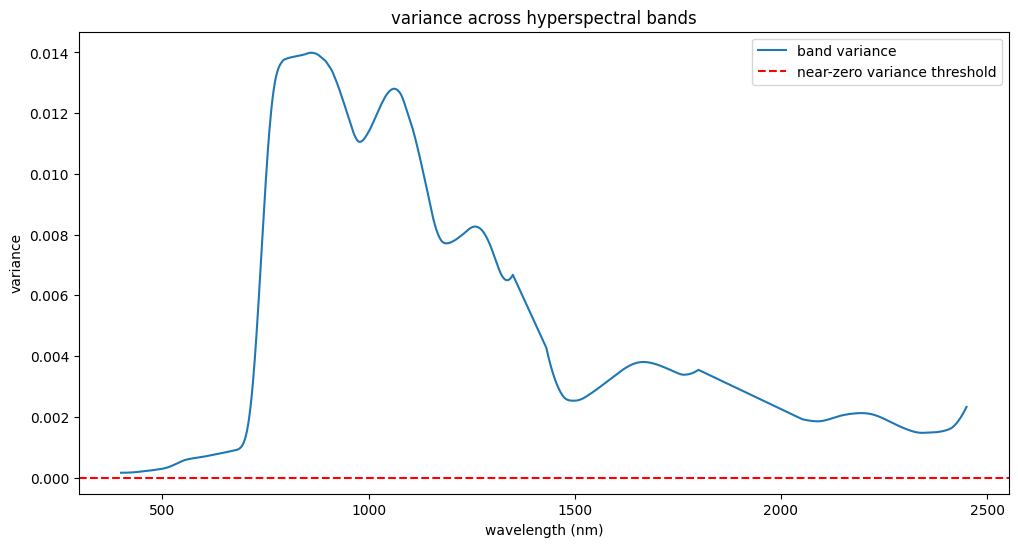

In [156]:
# visualizing band variances
variances = X.var(axis=0)

# extracting wavelengths and making sure they are floats for plotting
wavelengths = X.columns.astype(float)

plt.figure(figsize=(12,6))
plt.plot(wavelengths, variances, label="band variance")
plt.axhline(y=1e-6, color="r", linestyle="--", label="near-zero variance threshold")
plt.xlabel("wavelength (nm)")
plt.ylabel("variance")
plt.title("variance across hyperspectral bands")
plt.legend()
plt.show()

In [157]:
#near-zero variance predictors (hyperspectral bands)
variances = X.var(axis=0)
low_var = variances[variances < 1e-3 ] 
print(f"predictors with near-zero variance: {len(low_var)}")
if len(low_var) > 0:
    display(low_var.head())

predictors with near-zero variance: 291


400    0.000159
401    0.000158
402    0.000158
403    0.000158
404    0.000158
dtype: float64

Outlier counts per trait (|z| > 3):


LMA (g/m²)                    194
C content (mg/cm²)            114
N content (mg/cm²)            101
Sulfur content (mg/cm²)       100
Magnesium content (mg/cm²)     87
Manganese content (mg/cm²)     75
Boron content (mg/cm²)         72
Ca content (mg/cm²)            61
NSC (mg/cm²)                   60
Potassium content (mg/cm²)     58
dtype: int64

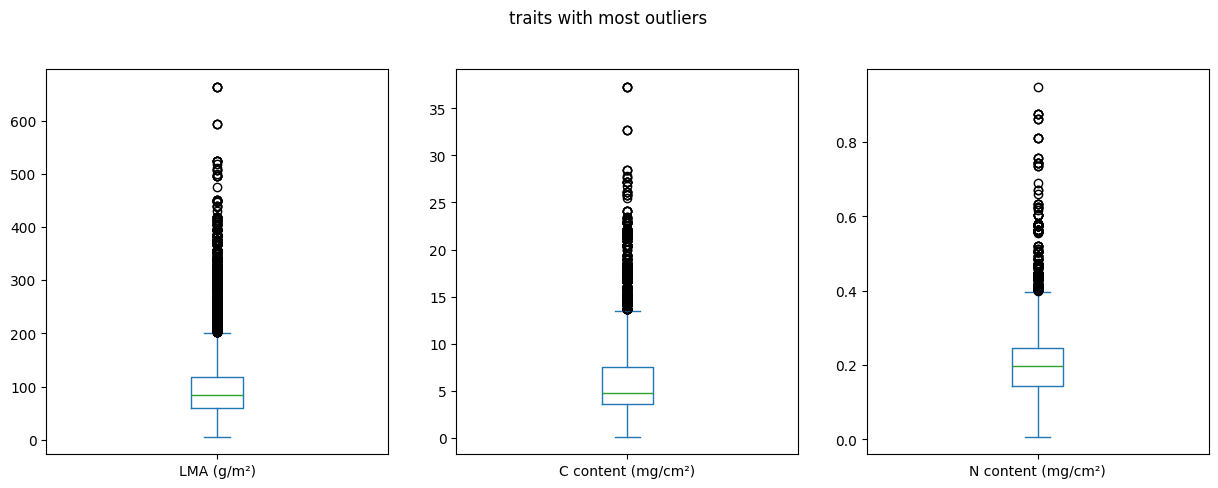

In [158]:
#doing outlier detection in traits

z_scores = Y.apply(lambda col: zscore(col, nan_policy="omit"))
outlier_num = (np.abs(z_scores) > 3).sum()  

print("Outlier counts per trait (|z| > 3):")
display(outlier_num.sort_values(ascending=False).head(10))

# visualizing traits with most outliers
top_outlier_traits = outlier_num.groupby(outlier_num.index).max().sort_values(ascending=False).head(3).index

subset_numeric = Y[top_outlier_traits].apply(pd.to_numeric, errors="coerce").dropna(how="all")

subset_numeric.plot(kind="box", subplots=True, layout=(1, 3), figsize=(15, 5), sharey=False)
plt.suptitle("traits with most outliers", y=1.0)
plt.show()

In [159]:

#specifically looking at the most prevalent traits
Y_prevalent = Y[most_prevalent_traits.index]
Y_prevalent.describe().T

,count,mean,std,min,25%,50%,75%,max
LMA (g/m²),8580.0,107.222398,79.026262,5.719115,60.450000,83.371516,117.277522,663.807328
N content (mg/cm²),6610.0,0.208002,0.100396,0.006942,0.143788,0.196854,0.245475,0.949037
C content (mg/cm²),5889.0,6.621356,4.898748,0.102753,3.543971,4.738608,7.538621,37.291503
Chl content (μg/cm²),5783.0,42.057171,13.997854,4.448305,31.579115,42.139876,52.485386,229.497477
EWT (mg/cm²),5084.0,16.159884,10.382098,0.226792,9.263031,12.170523,18.667494,80.620082


In [160]:

summary = {
    "n_observations": X.shape[0],
    "n_predictors": X.shape[1],
    "n_traits": Y.shape[1],
    "missing_X": int(X.isna().sum().sum()),
    "missing_Y": int(Y.isna().sum().sum())
}
display(pd.DataFrame([summary]))

,n_observations,n_predictors,n_traits,missing_X,missing_Y
0,13295,1721,37,0,397167


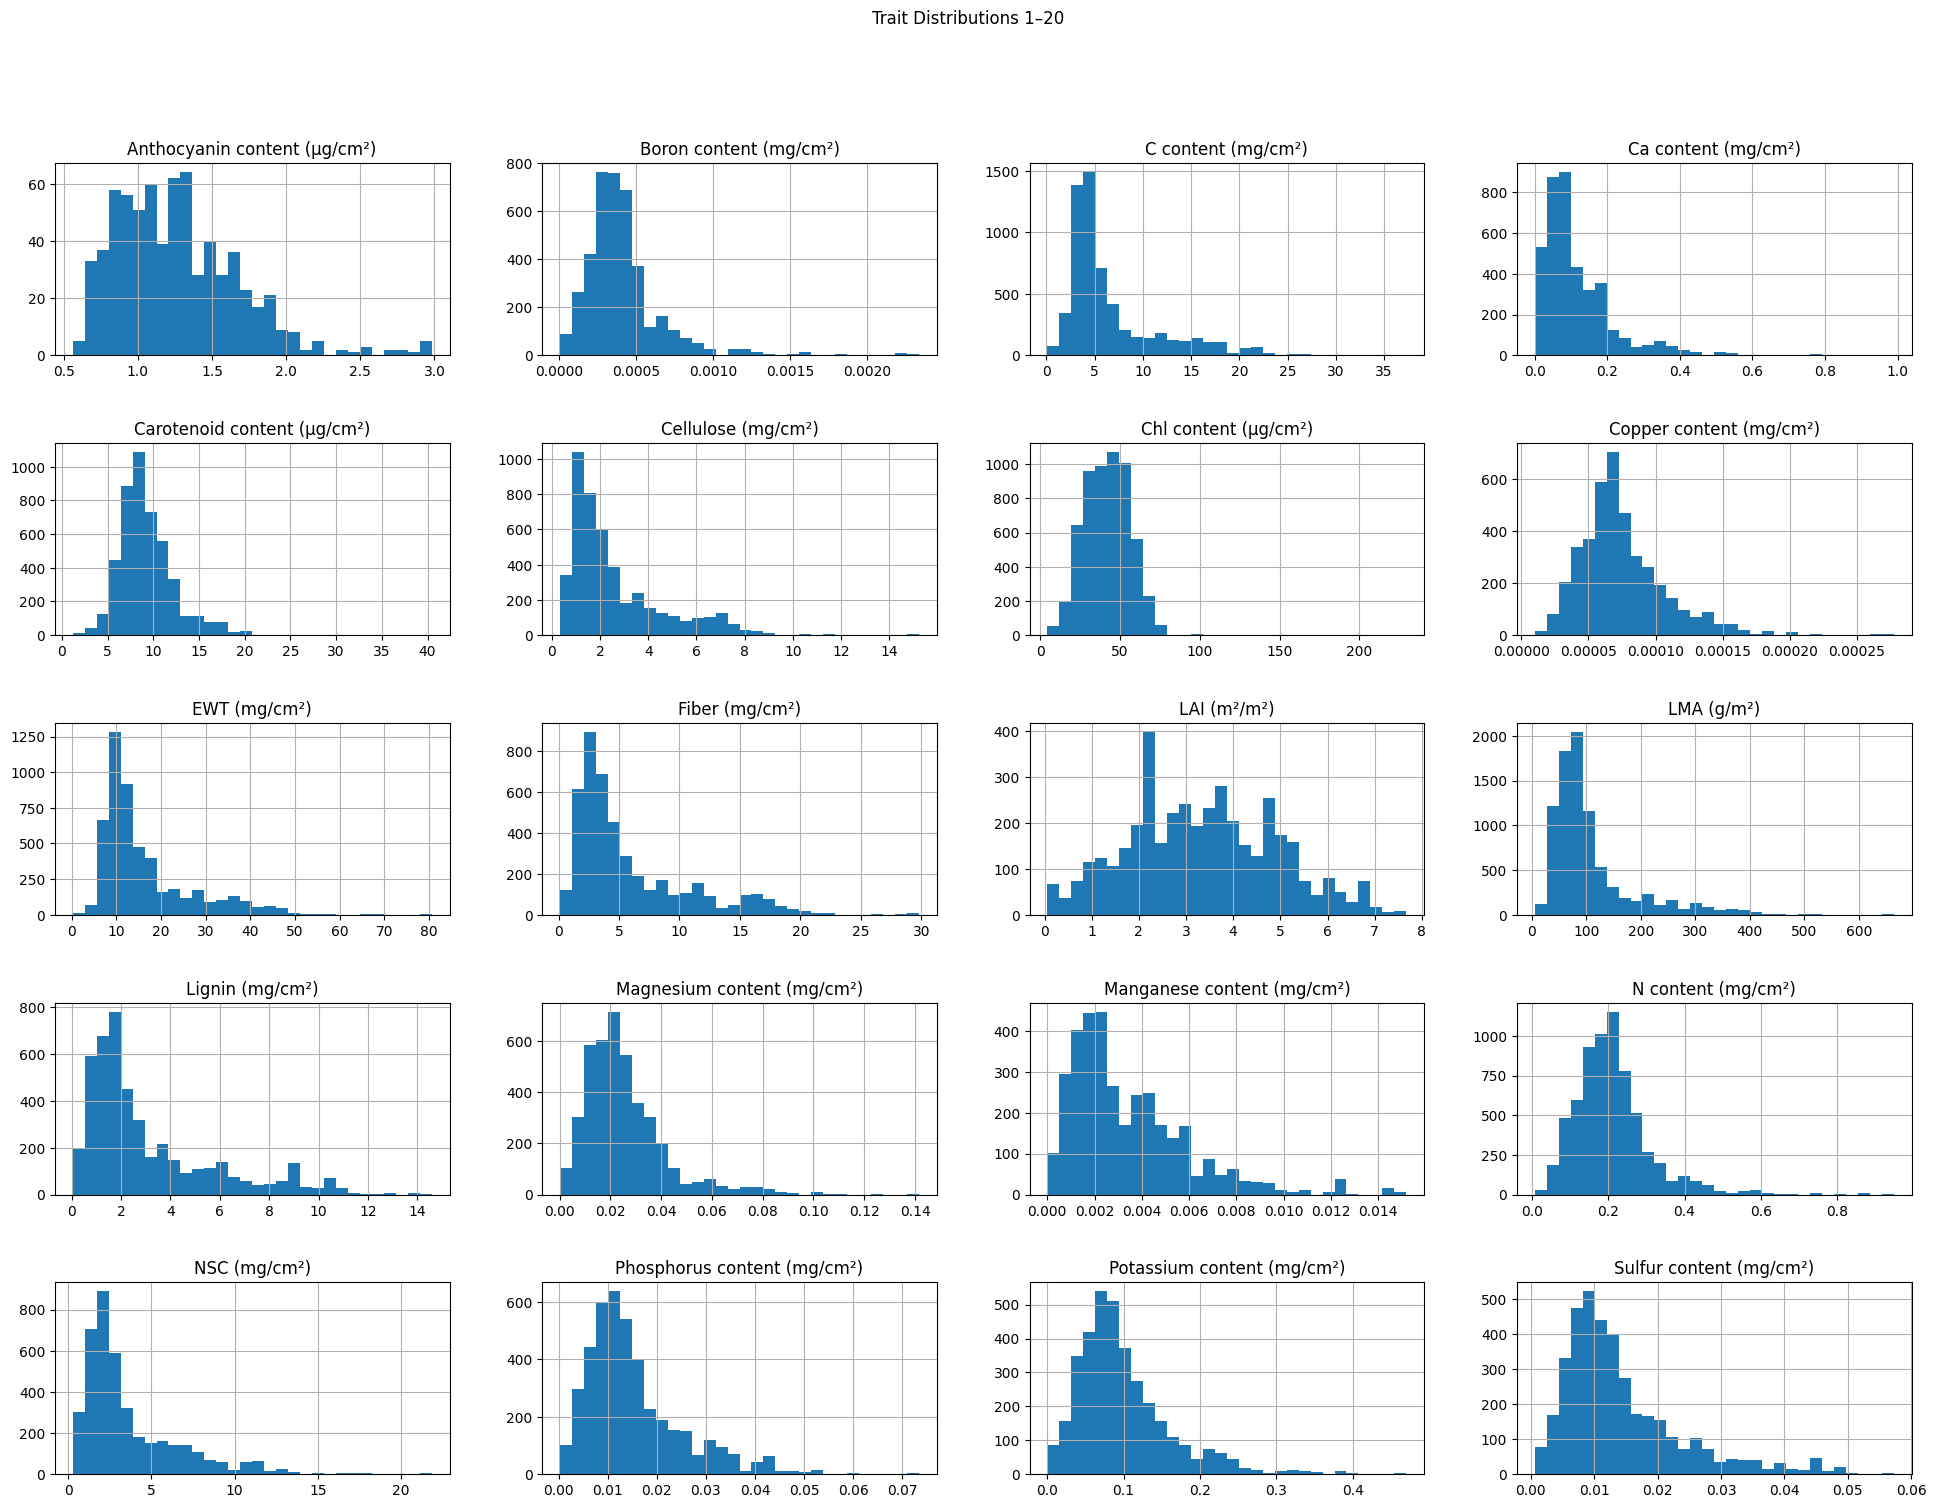

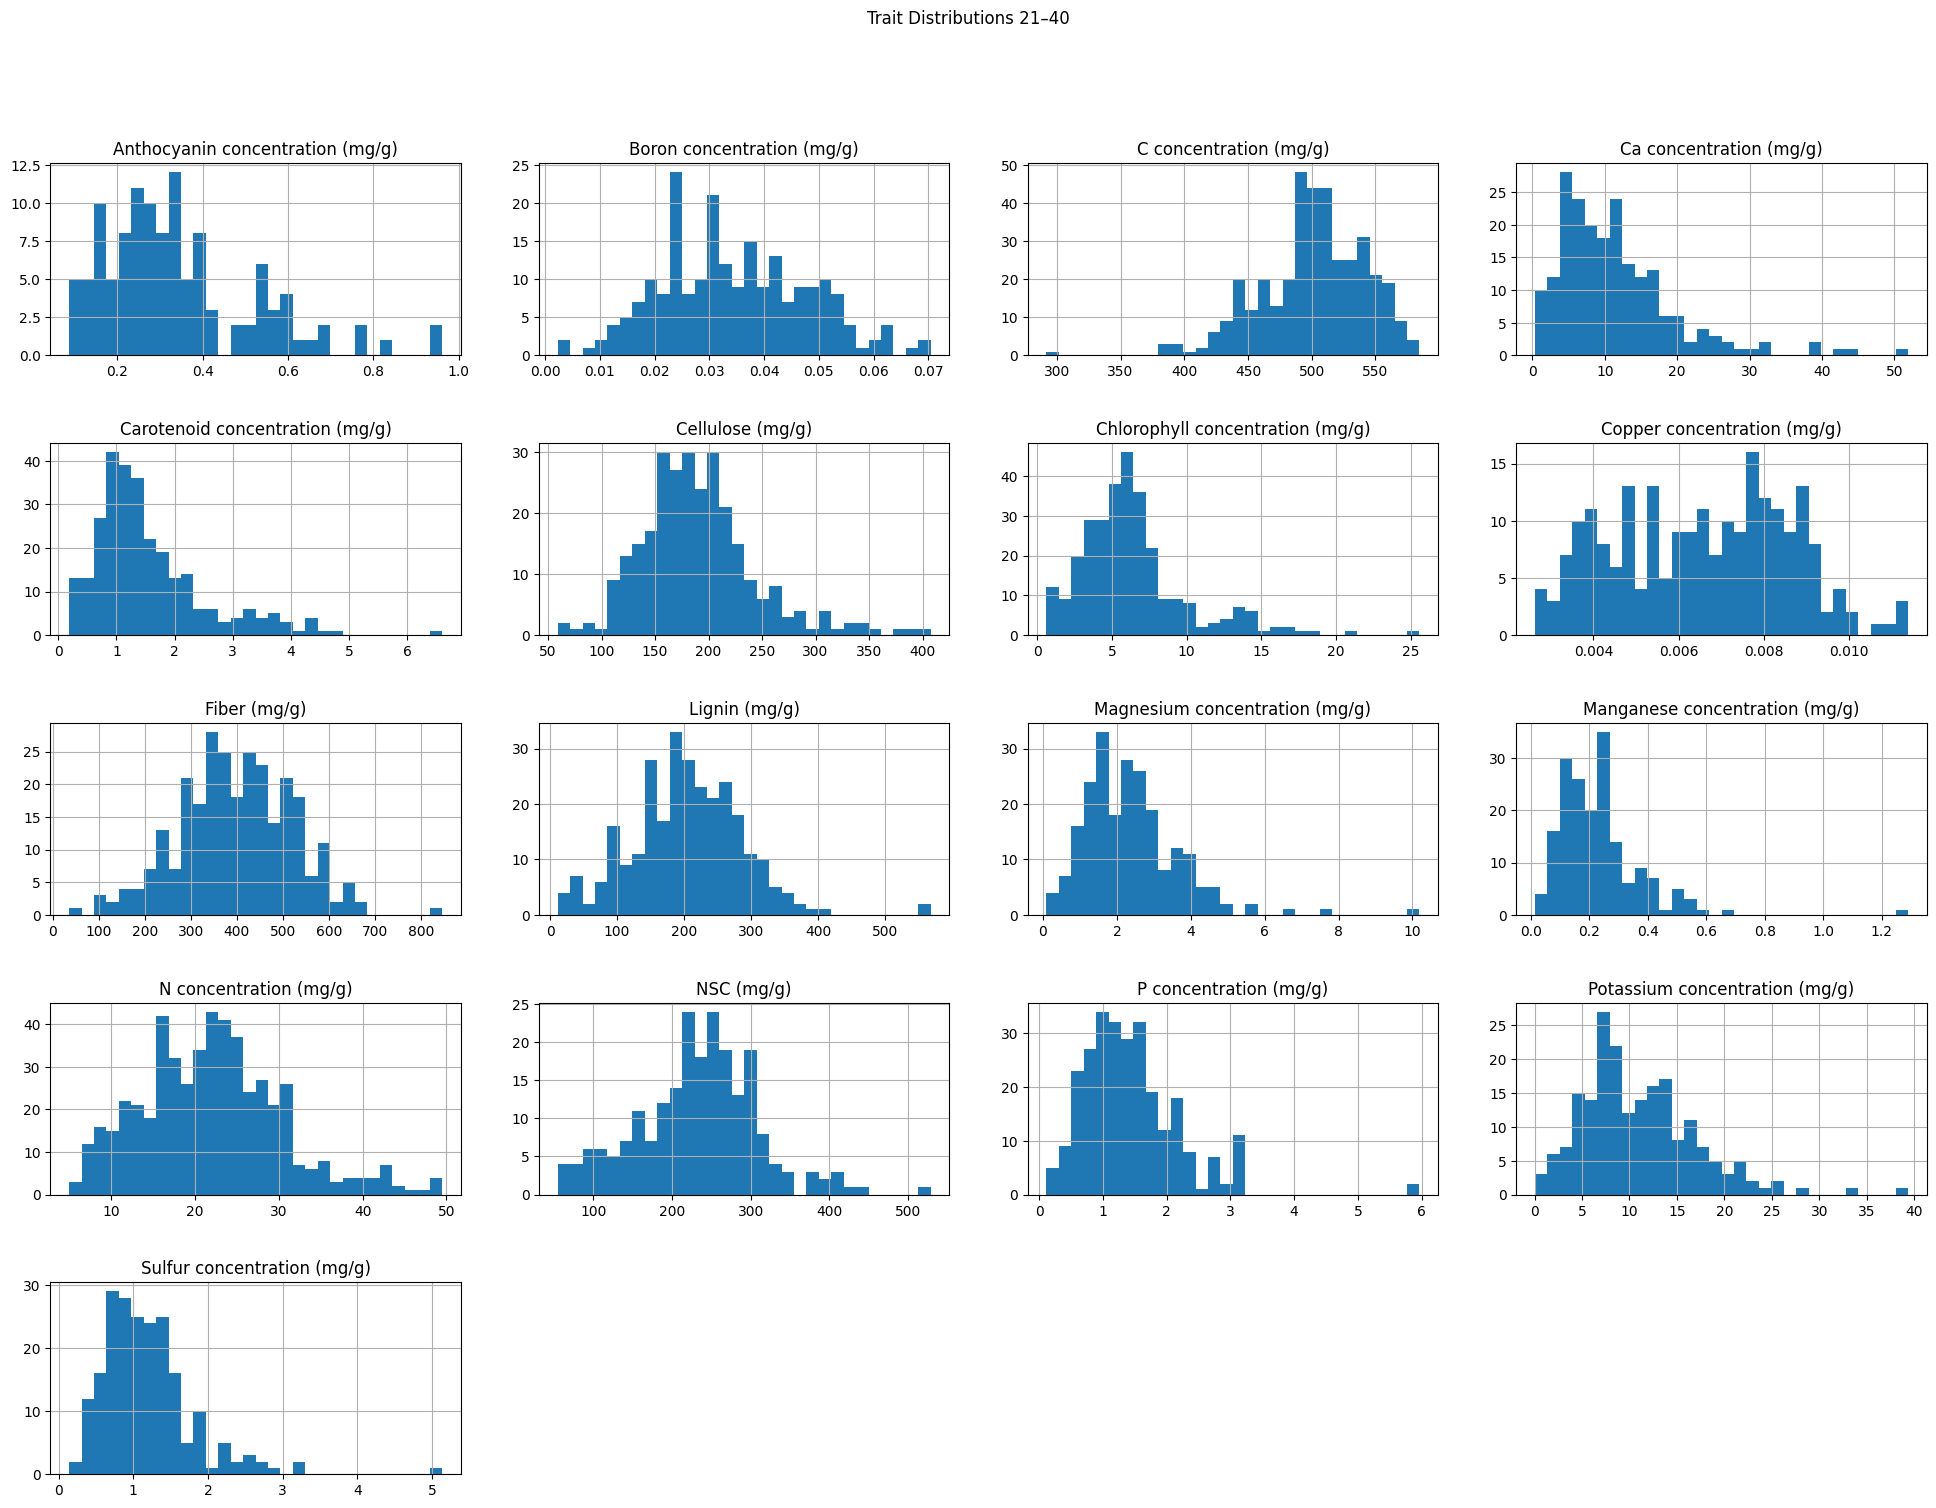

In [161]:
# histogram of traits
batch_size = 20
for i in range(0, Y.shape[1], batch_size):
    Y.iloc[:, i:i+batch_size].hist(figsize=(20, 15), bins=30, layout=(5, 4))
    plt.suptitle(f"Trait Distributions {i+1}–{i+batch_size}", y=1.02)
    plt.tight_layout(pad=3.0)
    plt.show()


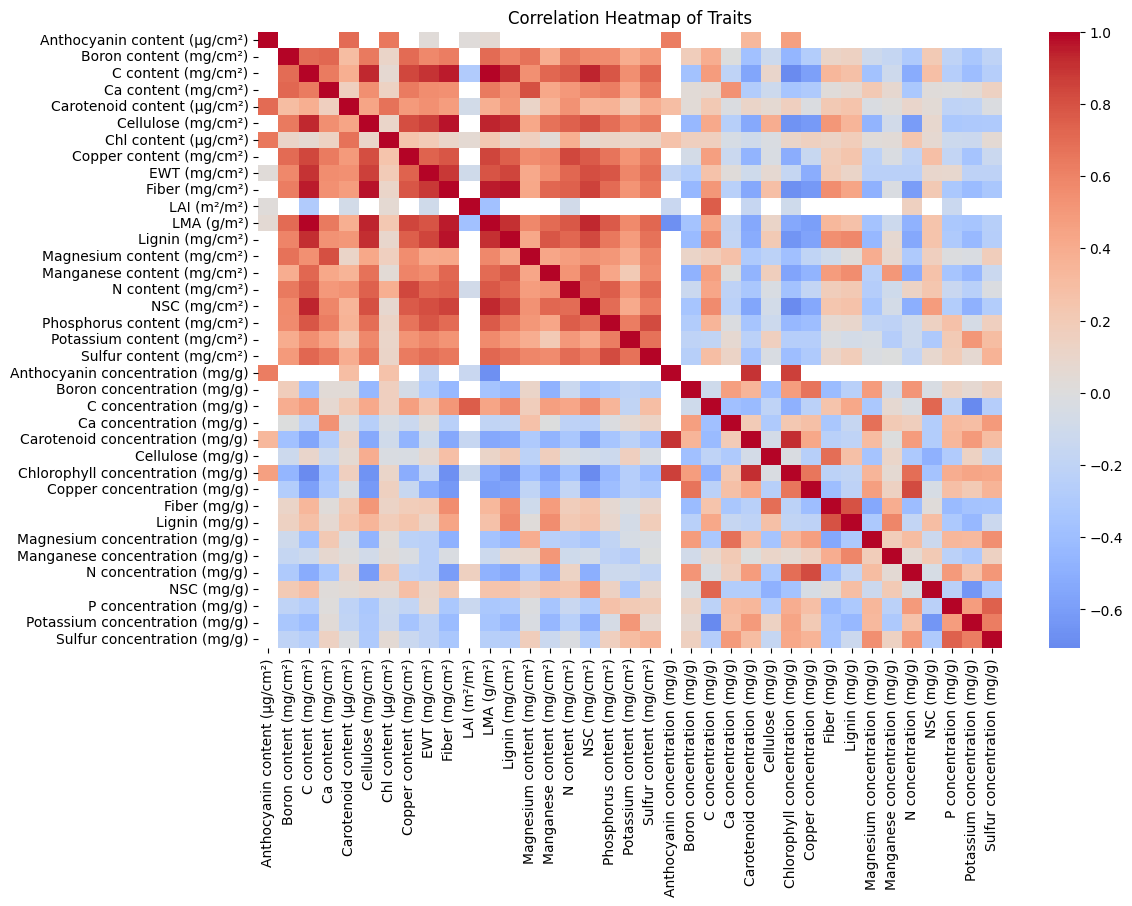

In [162]:
# correlation heatmap of traits
plt.figure(figsize=(12, 8))
corr = Y.corr()
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Traits")
plt.show()


In [163]:
#finding most correlated traits
corr_pairs = corr.unstack().reset_index()
corr_pairs.columns = ["1st Trait", "2nd Trait", "Correlation"]
# removing self-correlations 
corr_pairs = corr_pairs[corr_pairs["1st Trait"] != corr_pairs["2nd Trait"]]

#removing duplicate pairs (A/B and B/A)
corr_pairs["pair"] = corr_pairs.apply(lambda row: tuple(sorted([row["1st Trait"], row["2nd Trait"]])), axis=1)
corr_pairs = corr_pairs.drop_duplicates(subset=["pair"]).drop(columns=["pair"])
# sorting by absolute correlation value
corr_pairs["Abs_Correlation"] = corr_pairs["Correlation"].abs()
top_corr = corr_pairs.sort_values(by="Abs_Correlation", ascending=False).head(10)
print("top 10 most correlated trait pairs:")
display(top_corr)

top 10 most correlated trait pairs:


,1st Trait,2nd Trait,Correlation,Abs_Correlation
85,C content (mg/cm²),LMA (g/m²),0.996369,0.996369
194,Cellulose (mg/cm²),Fiber (mg/cm²),0.969911,0.969911
345,Fiber (mg/cm²),Lignin (mg/cm²),0.969697,0.969697
344,Fiber (mg/cm²),LMA (g/m²),0.950389,0.950389
83,C content (mg/cm²),Fiber (mg/cm²),0.949793,0.949793
90,C content (mg/cm²),NSC (mg/cm²),0.938485,0.938485
196,Cellulose (mg/cm²),LMA (g/m²),0.936813,0.936813
423,LMA (g/m²),NSC (mg/cm²),0.930347,0.930347
79,C content (mg/cm²),Cellulose (mg/cm²),0.926800,0.926800
86,C content (mg/cm²),Lignin (mg/cm²),0.918767,0.918767


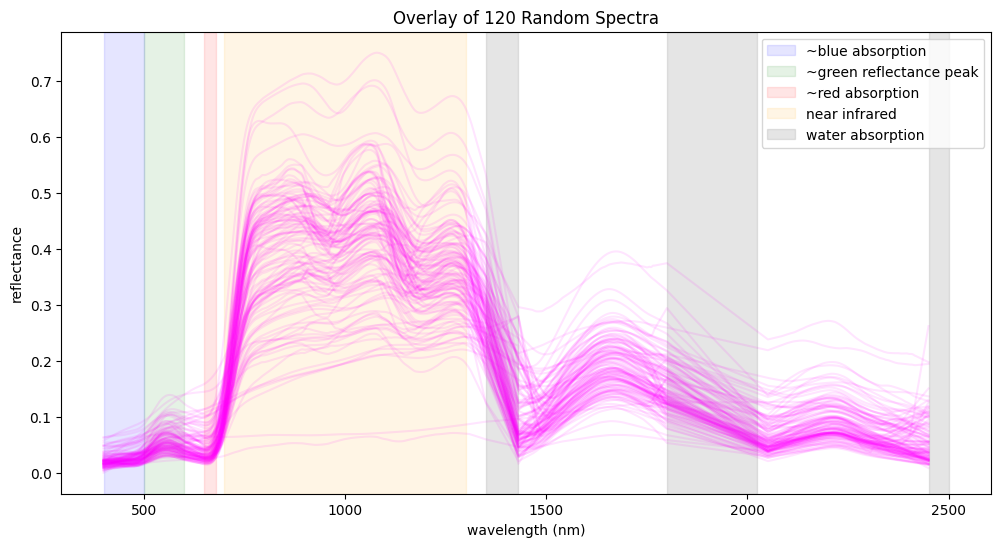

In [164]:
# getting the numeric wavelength columns
wavelengths = X.columns.astype(float)

# sampling 120 random spectra
sample_random_idx = np.random.choice(X.index, size=120, replace=False)
X_sample = X.loc[sample_random_idx]

plt.figure(figsize=(12,6))
for i in range(len(X_sample)):
    plt.plot(wavelengths, X_sample.iloc[i, :], color="magenta", alpha=0.1)  


# visible spectrum + near infrared
plt.axvspan(400, 500, color="blue", alpha=0.1, label="~blue absorption")
plt.axvspan(500, 600, color="green", alpha=0.1, label="~green reflectance peak")
plt.axvspan(650, 680, color="red", alpha=0.1, label="~red absorption")
plt.axvspan(700, 1300, color="orange", alpha=0.1, label="near infrared")

# water absorption bands (from dataset PDF)
plt.axvspan(1351, 1430, color="gray", alpha=0.2, label="water absorption")
plt.axvspan(1801, 2023, color="gray", alpha=0.2)
plt.axvspan(2451, 2501, color="gray", alpha=0.2)

plt.xlabel("wavelength (nm)")
plt.ylabel("reflectance")
plt.title("Overlay of 120 Random Spectra")
plt.legend(loc="upper right")
plt.show()

## applying PCA

In [165]:
X_df = X.copy()

wavs = X_df.columns.astype(float).values

# standardizing
scaler = StandardScaler(with_mean=True, with_std=True)
Xz = scaler.fit_transform(X_df)  

num_pc = min(20, Xz.shape[1])
pca = PCA(n_components=num_pc, svd_solver="randomized", random_state=0)
T = pca.fit_transform(Xz)         # scores  (no. of samples x num_pc)
P = pca.components_.T             # loadings (no. of bands/wavelengths  x num_pc)
explained_var = pca.explained_variance_ratio_  # variance explained by each PC

# variance explained
print(f"Explained variance by first {num_pc} PCs:")
for i, var in enumerate(explained_var):
    print(f"  PC{i+1}: {var*100:.2f}%")


Explained variance by first 20 PCs:
  PC1: 56.86%
  PC2: 31.44%
  PC3: 5.31%
  PC4: 1.73%
  PC5: 1.38%
  PC6: 1.16%
  PC7: 0.61%
  PC8: 0.33%
  PC9: 0.31%
  PC10: 0.21%
  PC11: 0.17%
  PC12: 0.10%
  PC13: 0.09%
  PC14: 0.06%
  PC15: 0.05%
  PC16: 0.04%
  PC17: 0.03%
  PC18: 0.02%
  PC19: 0.02%
  PC20: 0.01%


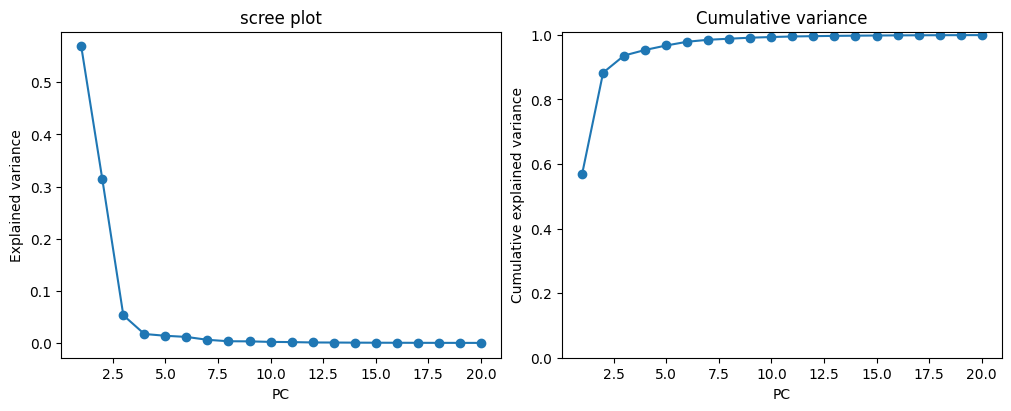

In [166]:

# scree & cumulative variance
fig, ax = plt.subplots(1,2, figsize=(10,4), constrained_layout=True)
ax[0].plot(np.arange(1, num_pc+1), explained_var, marker='o')
ax[0].set_xlabel("PC"); ax[0].set_ylabel("Explained variance")
ax[0].set_title("scree plot")

ax[1].plot(np.arange(1, num_pc+1), np.cumsum(explained_var), marker='o')
ax[1].set_xlabel("PC"); ax[1].set_ylabel("Cumulative explained variance")
ax[1].set_ylim(0,1.01)
ax[1].set_title("Cumulative variance")
plt.show()



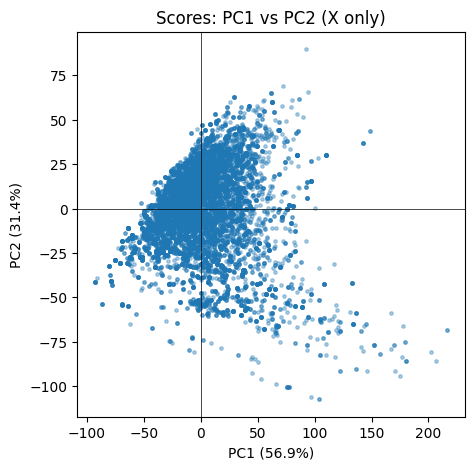

In [167]:
# score plot (PC1 vs PC2) 
plt.figure(figsize=(5,5))
plt.scatter(T[:,0], T[:,1], s=6, alpha=0.35)
plt.axhline(0, color='k', lw=.5); plt.axvline(0, color='k', lw=.5)
plt.xlabel(f"PC1 ({explained_var[0]*100:.1f}%)")
plt.ylabel(f"PC2 ({explained_var[1]*100:.1f}%)")
plt.title("Scores: PC1 vs PC2 (X only)")
plt.show()


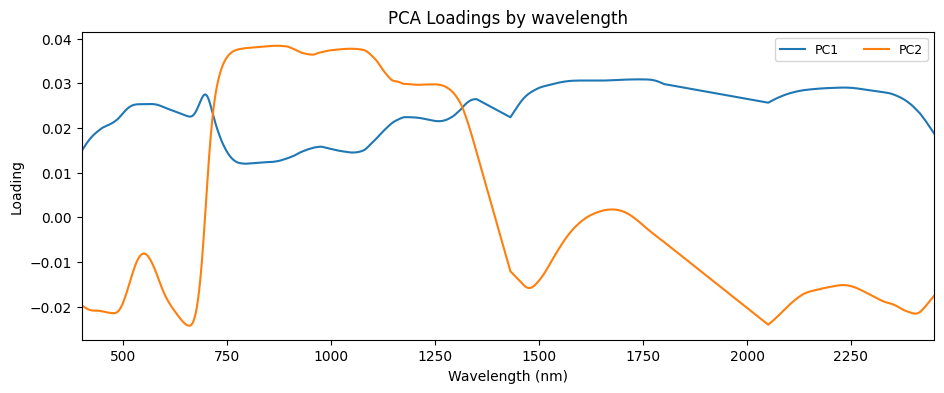

In [168]:
# plot (PC1 & PC2 vs wavelength)
fig, ax = plt.subplots(figsize=(11,4))
ax.plot(wavs, P[:,0], label="PC1")
ax.plot(wavs, P[:,1], label="PC2")
ax.set_xlim(wavs.min(), wavs.max())
ax.set_xlabel("Wavelength (nm)"); ax.set_ylabel("Loading")
ax.set_title("PCA Loadings by wavelength")

handles, labels = ax.get_legend_handles_labels()
uniq = dict(zip(labels, handles))
ax.legend(uniq.values(), uniq.keys(), ncol=3, fontsize=9)
plt.show()



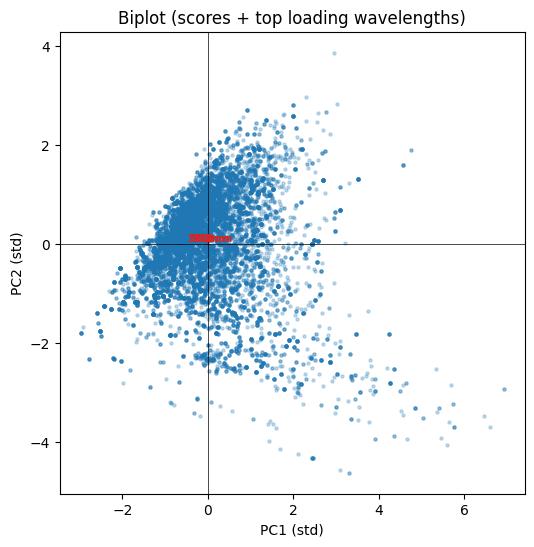

In [169]:
# biplot (scores + a few loading arrows)
k_arrows = 20 

# combined importance metric for pcs 1 & 2
imp = (P[:,0]**2) * pca.explained_variance_[0] + (P[:,1]**2) * pca.explained_variance_[1]
top_idx = np.argsort(imp)[::-1][:k_arrows]

# scaling scores to comparable range
scores2 = T[:, :2] / np.sqrt(pca.explained_variance_[:2])

plt.figure(figsize=(6,6))
plt.scatter(scores2[:,0], scores2[:,1], s=5, alpha=0.25)
scale = 3.0
for i in top_idx:
    plt.arrow(0, 0, scale*P[i,0], scale*P[i,1], head_width=0.03, alpha=0.6, color="tab:red")
    plt.text(scale*P[i,0]*1.05, scale*P[i,1]*1.05, f"{int(round(wavs[i]))}nm",
             fontsize=8, color="tab:red", ha="center", va="center")
plt.axhline(0, color='k', lw=.5); plt.axvline(0, color='k', lw=.5)
plt.xlabel("PC1 (std)"); plt.ylabel("PC2 (std)")
plt.title("Biplot (scores + top loading wavelengths)")
plt.show()


In [170]:
# listing the most influential wavelengths for PCs 1 & 2
top_table = pd.DataFrame({
    "wavelength_nm": wavs[top_idx].astype(int),
    "PC1_loading":    P[top_idx, 0],
    "PC2_loading":    P[top_idx, 1],
    "combined_importance": imp[top_idx]
}).sort_values("combined_importance", ascending=False).reset_index(drop=True)
display(top_table.head(15))


,wavelength_nm,PC1_loading,PC2_loading,combined_importance
0,990,0.015512,0.037236,0.985821
1,991,0.015486,0.037255,0.985814
2,989,0.015537,0.037216,0.985791
3,992,0.015460,0.037274,0.985774
4,988,0.015562,0.037196,0.985733
5,993,0.015435,0.037291,0.985717
6,987,0.015587,0.037175,0.985646
7,994,0.015411,0.037307,0.985643
8,995,0.015390,0.037322,0.985564
9,986,0.015612,0.037153,0.985529


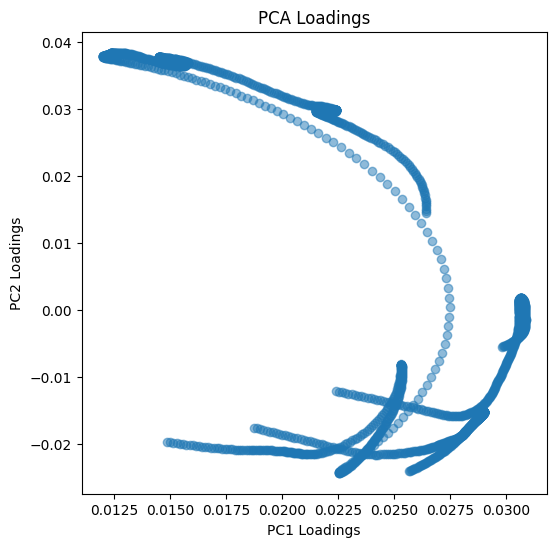

In [171]:
# Loadings plot
loadings = pca.components_.T[:, :2]
plt.figure(figsize=(6, 6))
plt.scatter(loadings[:, 0], loadings[:, 1], alpha=0.5)
plt.xlabel("PC1 Loadings")
plt.ylabel("PC2 Loadings")
plt.title("PCA Loadings")
plt.show()